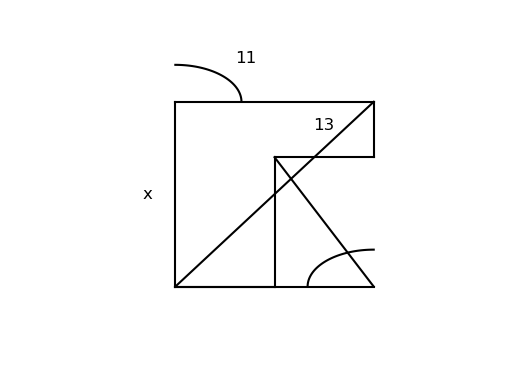

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arc(center, radius, angle_range, label=None):
    angles = np.linspace(np.radians(angle_range[0]), np.radians(angle_range[1]), 50)
    x_arc = center[0] + radius * np.cos(angles)
    y_arc = center[1] + radius * np.sin(angles)
    plt.plot(x_arc, y_arc, 'k')
    if label:
        mid_angle = np.radians((angle_range[0] + angle_range[1]) / 2)
        label_x = center[0] + (radius + 1) * np.cos(mid_angle)
        label_y = center[1] + (radius + 1) * np.sin(mid_angle)
        plt.text(label_x, label_y, label, fontsize=12, ha='center')

# Define points
A = (0, 0)
B = (0, 10)
C = (6, 10)
D = (6, 7)
E = (3, 7)
F = (3, 0)
G = (6, 0)

# Draw the shape
edges = [
    (A, B), (B, C), (C, D), (D, E), (E, F), (F, A), (E, G)
]

for edge in edges:
    x_values, y_values = zip(*edge)
    plt.plot(x_values, y_values, 'k')

# Draw diagonal lines
plt.plot([A[0], C[0]], [A[1], C[1]], 'k')
plt.plot([A[0], G[0]], [A[1], G[1]], 'k')

# Draw arcs
draw_arc(B, 2, (0, 90), label='11')
draw_arc(G, 2, (90, 180))

# Add text labels
plt.text(-1, 5, 'x', fontsize=12, va='center')
plt.text(4.5, 8.5, '13', fontsize=12, ha='center')

# Configure plot
plt.xlim(-5, 10)
plt.ylim(-5, 15)
plt.axis('off')
plt.show()
